Cantera Version: 3.2.0

Species: 53
Reactions: 325

Parameter Bounds:
Temperature: 800 - 1500 K
Pressure: 1 - 10 atm

Sample Data:
   Temperature_K  Pressure_atm  Specific_Heat
0    1246.644200      4.764189    1408.854867
1    1189.578541      2.797855    1394.581149
2     832.755474      9.444075    1277.842032
3    1392.647356      3.456091    1441.772787
4     828.166810      1.449177    1275.982036

Dataset saved as cantera_simulated_data.csv


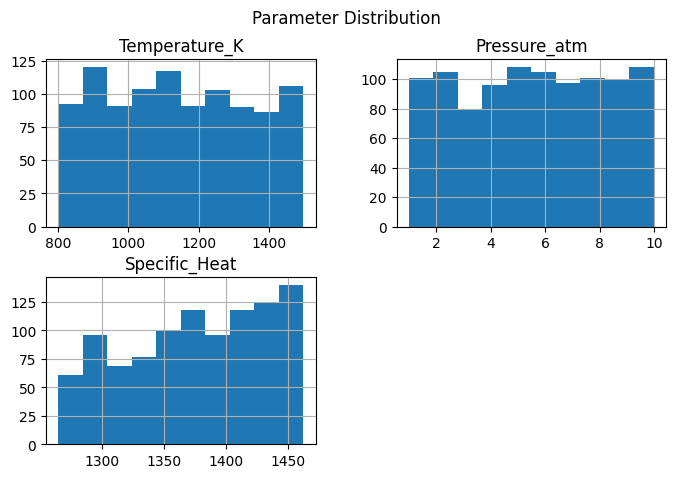


Model Comparison:
                       Model         MSE       MAE        R2
0          Linear Regression   40.916756  5.459629  0.987439
1              Decision Tree    0.064763  0.170963  0.999980
2              Random Forest    0.032829  0.117389  0.999990
3  Support Vector Regression  101.868925  5.258642  0.968727
4                        KNN    0.099742  0.216808  0.999969


<Figure size 640x480 with 0 Axes>

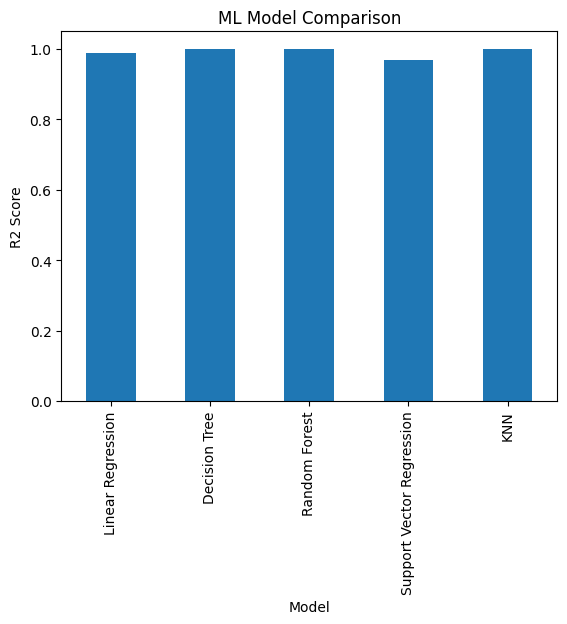


Graph saved as graph.png

Best Model:
Model    Random Forest
MSE           0.032829
MAE           0.117389
R2             0.99999
Name: 2, dtype: object


In [3]:
# Install Cantera
!pip install cantera

import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Correct version attribute
print("Cantera Version:", ct.__version__)


# 1. Load Chemical Mechanism
gas = ct.Solution("gri30.yaml")

print("\nSpecies:", gas.n_species)
print("Reactions:", gas.n_reactions)

# 2. Define Parameter Bounds
TEMP_MIN, TEMP_MAX = 800, 1500      # Kelvin
PRESS_MIN, PRESS_MAX = 1, 10       # atm

print("\nParameter Bounds:")
print("Temperature:", TEMP_MIN, "-", TEMP_MAX, "K")
print("Pressure:", PRESS_MIN, "-", PRESS_MAX, "atm")


# 3. Generate 1000 Simulations
records = []

for _ in range(1000):

    T = np.random.uniform(TEMP_MIN, TEMP_MAX)
    P = np.random.uniform(PRESS_MIN, PRESS_MAX)

    gas.TP = T, P * ct.one_atm
    gas.set_equivalence_ratio(1.0, "CH4", "O2:1,N2:3.76")

    specific_heat = gas.cp

    records.append([T, P, specific_heat])


df = pd.DataFrame(records, columns=["Temperature_K", "Pressure_atm", "Specific_Heat"])

print("\nSample Data:")
print(df.head())

# 4. Save Dataset
df.to_csv("cantera_simulated_data.csv", index=False)
print("\nDataset saved as cantera_simulated_data.csv")


# 5. Visualization (Parameter Distribution)
df.hist(figsize=(8,5))
plt.suptitle("Parameter Distribution")
plt.show()


# 6. Machine Learning
X = df[["Temperature_K", "Pressure_atm"]]
y = df["Specific_Heat"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Support Vector Regression": SVR(),
    "KNN": KNeighborsRegressor()
}

results = []

for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, mae, r2])

results_df = pd.DataFrame(
    results, columns=["Model", "MSE", "MAE", "R2"]
)

print("\nModel Comparison:")
print(results_df)


# 7. Model Comparison Plot (Save as graph.png)
plt.figure()
results_df.plot(x="Model", y="R2", kind="bar", legend=False)
plt.ylabel("R2 Score")
plt.title("ML Model Comparison")

plt.savefig("graph.png")   # ✅ Saves in same folder
plt.show()

print("\nGraph saved as graph.png")


# 8. Best Model
best = results_df.sort_values("R2", ascending=False).iloc[0]
print("\nBest Model:")
print(best)